In [1]:
# Importing the Pandas library with the alias "pd" to use its data manipulation and analysis functions
import pandas as pd
# Importing the NumPy library with the alias "np" to use its powerful tools for scientific computing.
import numpy as np
#Importing the Pyplot module from the Matplotlib library with the alias "plt" to create visualizations.
import matplotlib.pyplot as plt
# Importing the Seaborn library with the alias "sns" to create higher-level statistical visualizations.
import seaborn as sns

In [2]:
#ignore warning messages that may appear during code execution.
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read the csv file and store it in a variable
dataset=pd.read_csv('Churn_Modelling.csv')

In [4]:
#b)le nbre d'observations
dataset.shape

(10000, 14)

In [81]:
#c)donner le type des variables

dataset.dtypes


CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
#d)provide descriptive statistics for the numerical columns of a Pandas DataFrame.
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [82]:
#e)la description des variables categoriques

dataset.describe(include='object')


,Geography,Gender
count,9984,9984
unique,3,2
top,France,Male
freq,5008,5450


In [6]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [85]:
#5)supprimer les variables inutiles
dataset=dataset.iloc[:,3:]
dataset

,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,1,1,101348.88,1
1,1,0,1,112542.58,0
2,3,1,0,113931.57,1
3,2,0,0,93826.63,0
4,1,1,1,79084.10,0
...,...,...,...,...,...
9995,2,1,0,96270.64,0
9996,1,1,1,101699.77,0
9997,1,0,1,42085.58,1
9998,2,1,0,92888.52,1


In [87]:
#6)verifier si la base est equilibre

target_count = dataset['Exited'].value_counts()
print(target_count)
#standard sclaer lel mise en echelle

Exited
0    7963
1    2021
Name: count, dtype: int64


<Axes: >

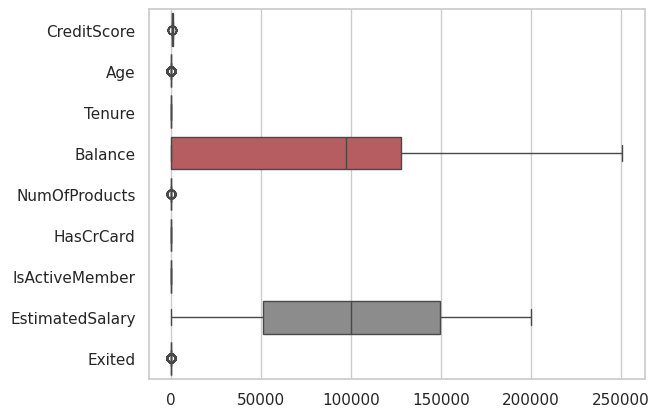

In [8]:
#create a white grid plot with a horizontal box plot showing
#the distribution of the data in the 'dataset' variable
sns.set(style='whitegrid')
sns.boxplot(data=dataset,orient='h')

<Axes: xlabel='CreditScore'>

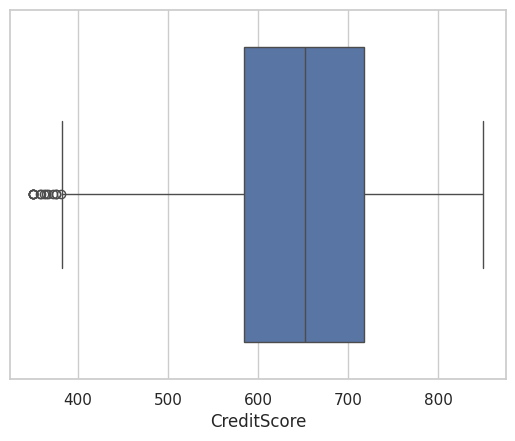

In [9]:
sns.set(style='whitegrid')
sns.boxplot(data=dataset['CreditScore'],orient='h')

<Axes: xlabel='Tenure'>

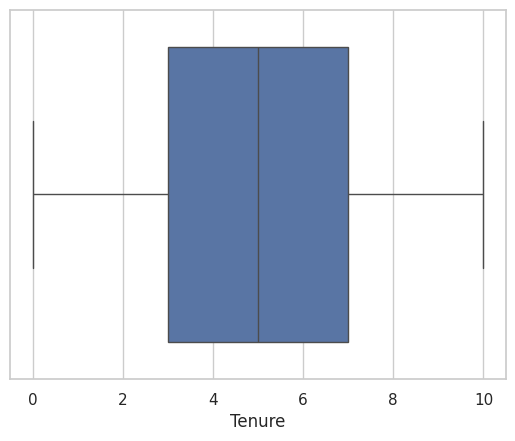

In [10]:
sns.set(style='whitegrid')
sns.boxplot(data=dataset['Tenure'],orient='h')

<Axes: xlabel='NumOfProducts'>

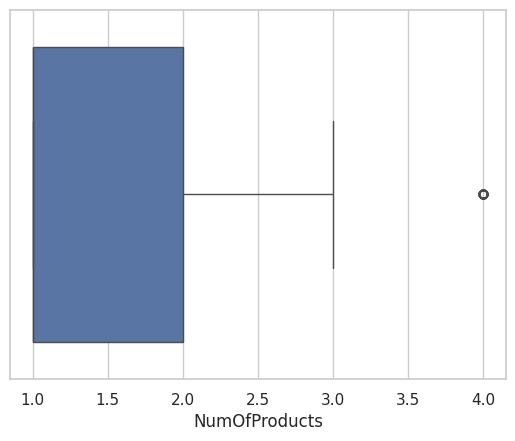

In [11]:
sns.set(style='whitegrid')
sns.boxplot(data=dataset['NumOfProducts'],orient='h')

<Axes: xlabel='HasCrCard'>

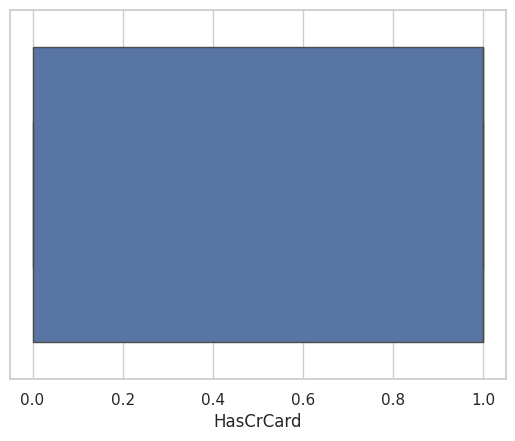

In [12]:
sns.set(style='whitegrid')
sns.boxplot(data=dataset['HasCrCard'],orient='h')

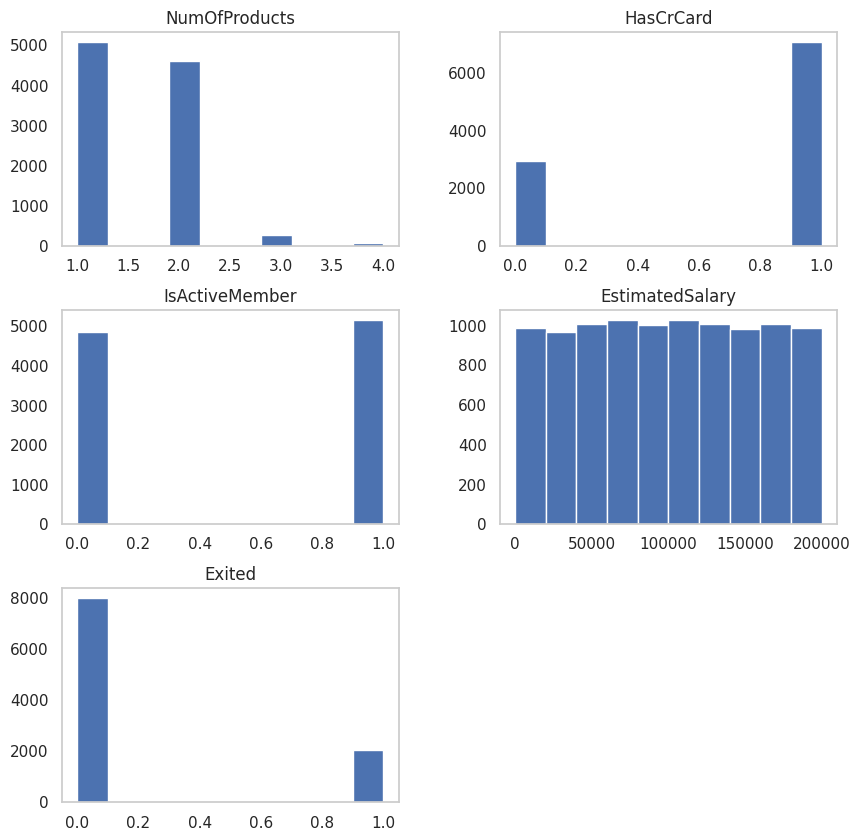

In [90]:
#9) verifier la distribution des variables numeriques

import matplotlib.pyplot as plt
dataset.hist(figsize=(10,10),bins=10,grid=False)
plt.show()


In [13]:

q1=dataset['CreditScore'].quantile(0.25)
q3=dataset['CreditScore'].quantile(0.75)
IQR=q3-q1
borne_inf = q1-1.5*IQR
borne_sup = q3 +1.5*IQR
dataset= dataset[dataset['CreditScore']<borne_sup]
dataset=dataset [dataset['CreditScore']>borne_inf]

In [14]:
x=dataset.iloc[:,:10]
y=dataset.iloc[:,10]

In [15]:
dataset.shape

(9984, 11)

In [16]:
#encoder les variables categoriques
x=pd.get_dummies(data=x,drop_first=True)
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [17]:
x=x.values

In [80]:
x

array([[619, 42, 2, ..., False, False, False],
       [608, 41, 1, ..., False, True, False],
       [502, 42, 8, ..., False, False, False],
       ...,
       [709, 36, 7, ..., False, False, False],
       [772, 42, 3, ..., True, False, True],
       [792, 28, 4, ..., False, False, False]], dtype=object)

In [18]:
y[y==1].count()

2021

In [19]:
#11)
from sklearn.model_selection import train_test_split
#Split the dataset into training and testing sets with 80-20 split ratio
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [20]:
y_train.shape

(7987,)

In [21]:
y_test.shape

(1997,)

In [22]:
#Mise en echelle des donnes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #Create an instance of the StandardScaler class
#Scale the training data to have zero mean and unit variance,
#and fit the scaler to the data
x_train_sc = scaler.fit_transform(x_train)
#Scale the testing data using the scaler that was fit to the training data
x_test_sc = scaler.transform(x_test)

In [23]:
dataset.Exited.isnull().count()

9984

In [24]:
#importation du modele de regression logistique
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train_sc,y_train)

LogisticRegression()

In [25]:
lr.intercept_

array([-1.66980171])

In [26]:
lr.coef_

array([[-0.03551011,  0.78887514, -0.04297625,  0.17863338, -0.04322133,
        -0.03175047, -0.5389419 ,  0.02844897,  0.31797582,  0.01938662,
        -0.25797236]])

In [98]:
lr.coef_[0][0]

-0.035510111199095154

In [97]:
x_calcule=x_test_sc[0,:]

In [28]:
w=x_calcule.dot(lr.coef_[0,:])+lr.intercept_

In [29]:
w

array([-1.93636539])

In [91]:
#12)  afficher les parametres optimaux

print('Optimal parameters:', lr.get_params())


Optimal parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [30]:
from math import exp
v1=1/(1+exp(-w))

In [31]:
v1 #the predicted probability of belonging to class 1 is 0.1260

0.12604770015565983

In [105]:
#13) utiliser le modele obtenu pour predire les valeurs de nos donnee de test , comparer alors les valeurs predites aux valeur reeles
# Make predictions on the test set
y_pred = lr.predict(x_test_sc)
print(y_pred)

[0 0 0 ... 0 0 0]


In [103]:
# Compare predicted values with actual values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head())


      Actual  Predicted
335        1          0
7357       0          0
5807       0          0
4739       0          0
4488       0          0


In [100]:
#returns the predicted probabilities for each class (0 and 1) for each sample in x_test_sc.
lr.predict_proba(x_test_sc)

array([[0.8739523 , 0.1260477 ],
       [0.93587072, 0.06412928],
       [0.81158025, 0.18841975],
       ...,
       [0.56096477, 0.43903523],
       [0.78991941, 0.21008059],
       [0.66189097, 0.33810903]])

In [33]:
#predicts the probabilities of class 1 for the test data using the logistic regression model
#and then extracts those probabilities as a one-dimensional array
y_test_pred_prob=lr.predict_proba(x_test_sc)[:,1]
y_test_pred_prob

array([0.1260477 , 0.06412928, 0.18841975, ..., 0.43903523, 0.21008059,
       0.33810903])

In [34]:
# the number of predicted positive outcomes (with a probability greater than or equal to 0.5) in the test set.
y_test_pred_prob[y_test_pred_prob>=0.5].shape

(162,)

In [35]:
y_pred_lr = lr.predict(x_test_sc)
y_pred_lr 

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
#the number of predicted 1
y_pred_lr[y_pred_lr==1].shape

(162,)

In [37]:
#the number of predicted 0
y_pred_lr[y_pred_lr==0].shape

(1835,)

In [93]:
# 14) considerer la premiere ligne des donnes de test,calculer sa sortie par l'equation du modele optimise et verifier la valeur obtenu avec celle predite

import numpy as np
# Extract the first row of the test data
x_test_first_row = x_test_sc[0, :]

# Calculate the output using the equation of the optimized model
w = x_test_first_row.dot(lr.coef_[0, :]) + lr.intercept_
v1 = 1 / (1 + np.exp(-w))

# Print the calculated output
print("Calculated output for the first row:", v1)

# Get the predicted value for the first row using the model
y_pred_first_row = lr.predict(x_test_sc[0:1, :])[0] 

# Print the predicted value
print("Predicted value for the first row:", y_pred_first_row)


Calculated output for the first row: [0.1260477]
Predicted value for the first row: 0


In [95]:
from sklearn import metrics
from sklearn.metrics import f1_score


In [96]:
#importation de  la matrice de confusion et Afficheage des resultats d'evalation du modele
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Calculate the confusion matrix
Matrice= confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(Matrice)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


[[1525   63]
 [ 310   99]]
Accuracy: 0.8132198297446169
Precision: 0.6111111111111112
Recall: 0.24205378973105135
F1 Score: 0.34676007005253945


[0.         0.03967254 1.        ] [0.         0.24205379 1.        ] [2 1 0]


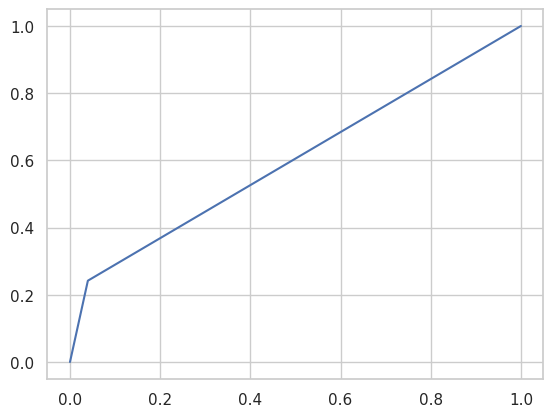

In [39]:
#arrays of false positive rates fpr, true positive rates tpr, and threshold values thr
fpr, tpr, thr = metrics.roc_curve(y_test,y_pred_lr)
print(fpr, tpr, thr)
plt.plot(fpr,tpr)

In [40]:
fpr1,tpr1,thr1=metrics.roc_curve(y_test,y_test_pred_prob)

In [41]:
thr1.shape

(563,)

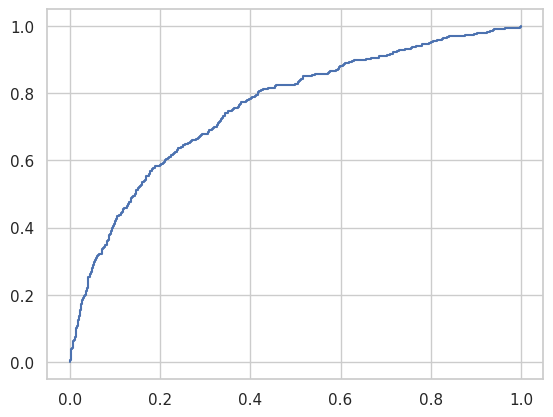

In [42]:
plt.plot(fpr1,tpr1)

In [43]:
from numpy import argmax

In [44]:
best=tpr1-fpr1
best

In [45]:
#Searching for the index of the best threshold
ix=argmax(best)

In [46]:
ix

300

In [47]:
best_thr=thr1[ix]

In [48]:
#Best threshold
best_thr

0.22990572777745696

In [49]:
#Best True Positive rate
tpr1[ix]

0.6381418092909535

In [50]:
#False Positive rate
fpr1[ix]

0.23929471032745592

# KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
## Créer un classifieur KNN avec 5 voisins
knn=KNeighborsClassifier(n_neighbors=5)

In [53]:
knn.fit(x_train_sc,y_train)

KNeighborsClassifier()

In [54]:
y_pred_knn=knn.predict(x_test_sc)

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [56]:
#confusion matrix while k=5
print(confusion_matrix(y_test,y_pred_knn))

[[1503   85]
 [ 254  155]]


In [57]:
print('Accuracy score {0:.3f}'.format(accuracy_score(y_test,y_pred_knn)))
print('Precision score {0:.3f}'.format(precision_score(y_test,y_pred_knn)))
print('Recall score {0:.3f}'.format(recall_score(y_test,y_pred_knn)))

Accuracy score 0.830
Precision score 0.646
Recall score 0.379


In [58]:
from sklearn.metrics import classification_report

In [59]:
#showing useful statics about knn results
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1588
           1       0.65      0.38      0.48       409

    accuracy                           0.83      1997
   macro avg       0.75      0.66      0.69      1997
weighted avg       0.81      0.83      0.81      1997



[0.         0.05352645 1.        ] [0.         0.37897311 1.        ] [2 1 0]


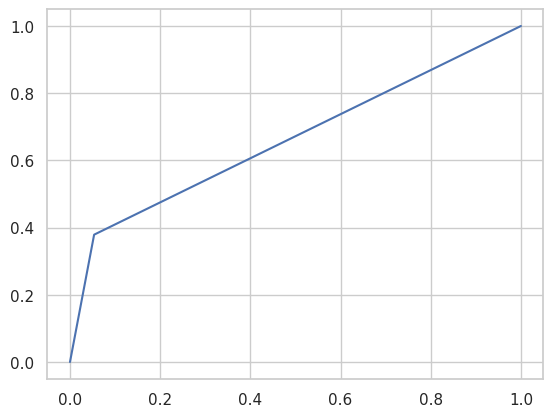

In [60]:
#arrays of false positive rates fpr, true positive rates tpr, and threshold values thr
fpr2, tpr2, thr2= metrics.roc_curve(y_test,y_pred_knn)
print(fpr2, tpr2, thr2)
plt.plot(fpr2,tpr2)

In [61]:
#Searching for the best value of n_neighbors
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':[1,3,5,7,9,11,13,15]}
model = KNeighborsClassifier()
clf=GridSearchCV(model, parameters, scoring='accuracy', cv=5)
grille=clf.fit(x_train_sc,y_train)

In [62]:
print(grille.best_params_)
print(grille.best_score_)

{'n_neighbors': 11}
0.8327272741521767


In [63]:
y_pred_knn_op=grille.predict(x_test_sc)


In [64]:
print(classification_report(y_test,y_pred_knn_op))
#The results are optimized with k=11

              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1588
           1       0.71      0.32      0.44       409

    accuracy                           0.83      1997
   macro avg       0.78      0.64      0.67      1997
weighted avg       0.82      0.83      0.81      1997



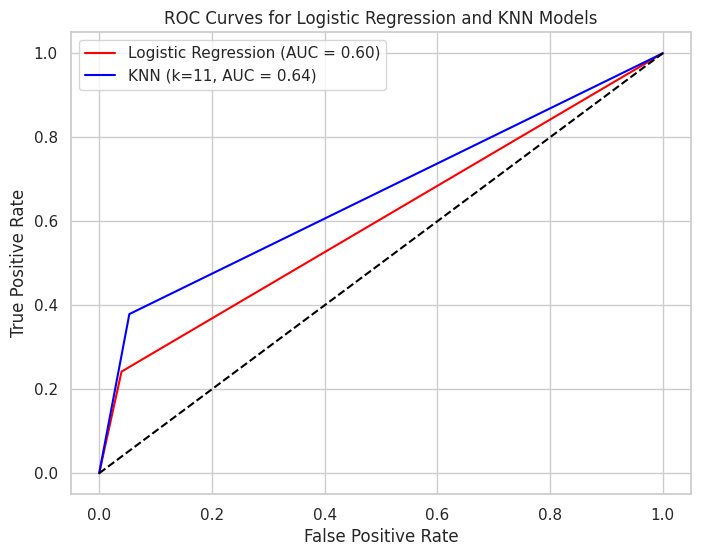

In [109]:
# prompt: tracer lesbcourbes ROC des deux modele meme figure ,pour une comparaison avec indication de auc pour chaque type

import matplotlib.pyplot as plt
# Create a figure with a single subplot
fig = plt.figure(figsize=(8, 6))

# Plot the ROC curve for the logistic regression model
plt.plot(fpr, tpr, color='red', label='Logistic Regression (AUC = %0.2f)' % metrics.roc_auc_score(y_test, y_pred_lr))

# Plot the ROC curve for the KNN model with optimized k
plt.plot(fpr2, tpr2, color='blue', label='KNN (k=11, AUC = %0.2f)' % metrics.roc_auc_score(y_test, y_pred_knn_op))

# Add a diagonal line for reference
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic Regression and KNN Models')

# Add legend
plt.legend()

# Show the plot
plt.show()
